In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [106]:
df = pd.read_csv('immo_data.csv')
df = df[0:5000]

In [107]:
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.fillna(df.mean())

cat_col_list = list(df.loc[:, df.dtypes == np.object].astype('category'))
for i in cat_col_list:
    df[i] = df[i].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [15]:
#سوال 1 - حالت 1
#5 kf
from sklearn.model_selection import KFold

features = df[['baseRentRange']].to_numpy()
target = df['livingSpaceRange'].to_numpy() 
weights = np.random.rand(1)
b = np.random.rand(1) 
bias = np.array([b[0] for i in range(len(features))])


kf = KFold(n_splits=5)
kf.get_n_splits(features)
#print(kf)

acc_score = []

for train_index, test_index in kf.split(features):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    
def linearRegr(X_train, weights, bias):
    y_hat = weights.dot(X_train.transpose()) + np.array([bias[0] for i in range(len(X_train))]) 
    return y_hat
y_hat = linearRegr(X_test, weights, b)

acc = accuracy_score(X_train , y_train)
acc_score.append(acc)
def meanSqrError(y, y_hat):
    MSE = np.sum((y - y_hat) ** 2) / len(y)
    return MSE

avg_acc_score = sum(acc_score)/k
print('MSE- {}'.format(meanSqrError(X_test, y_hat)))
print('--------------------------------------------')
print('accuracy of each fold - {}'.format(acc_score))
print('--------------------------------------------')
print('Avg accuracy : {}'.format(avg_acc_score))

MSE- 8088.220146606301
--------------------------------------------
accuracy of each fold - [0.271]
--------------------------------------------
Avg accuracy : 0.054200000000000005


In [14]:
#سوال 1 - حالت 1
#10 kf
from sklearn.model_selection import KFold

features = df[['baseRentRange']].to_numpy()
target = df['livingSpaceRange'].to_numpy() 
weights = np.random.rand(1)
b = np.random.rand(1) 
bias = np.array([b[0] for i in range(len(features))])


kf = KFold(n_splits=10)
kf.get_n_splits(features)
#print(kf)

acc_score = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
def linearRegr(X_train, weights, bias):
    y_hat = weights.dot(X_train.transpose()) + np.array([bias[0] for i in range(len(X_train))]) 
    return y_hat
y_hat = linearRegr(X_test, weights, b)

acc = accuracy_score(X_train , y_train)
acc_score.append(acc)
def meanSqrError(y, y_hat):
    MSE = np.sum((y - y_hat) ** 2) / len(y)
    return MSE

avg_acc_score = sum(acc_score)/k
print('MSE- {}'.format(meanSqrError(X_test, y_hat)))
print('--------------------------------------------')
print('accuracy of each fold - {}'.format(acc_score))
print('--------------------------------------------')
print('Avg accuracy : {}'.format(avg_acc_score))

MSE- 4849.5666484362155
--------------------------------------------
accuracy of each fold - [0.268]
--------------------------------------------
Avg accuracy : 0.0536


In [13]:
#سوال 1 - حالت 2
#5 kf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['baseRentRange']]
y = df['livingSpaceRange']

k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('--------------------------------------------')
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.409, 0.412, 0.398, 0.424, 0.422]
--------------------------------------------
Avg accuracy : 0.413


In [261]:
#سوال 1 - حالت 2
#10 kf

X = df[['baseRentRange']]
y = df['livingSpaceRange']

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('--------------------------------------------')
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.394, 0.424, 0.406, 0.418, 0.392, 0.404, 0.41, 0.42, 0.41, 0.434]
--------------------------------------------
Avg accuracy : 0.4112


In [267]:

x = df[['noRoomsRange','livingSpace','thermalChar','numberOfFloors']]
y = df['livingSpaceRange']

In [268]:
#سوال 1 - حالت 3
#متغیر kf

x = df[['noRoomsRange','livingSpace','thermalChar','numberOfFloors']]
y = df['livingSpaceRange']

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('--------------------------------------------')
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.394, 0.424, 0.406, 0.418, 0.392, 0.404, 0.41, 0.42, 0.41, 0.434]
--------------------------------------------
Avg accuracy : 0.4112


In [16]:
#سوال 1 - حالت 4
#متغیر kf

x = df[['serviceCharge','balcony']]
y = df['livingSpaceRange']

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('--------------------------------------------')
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.394, 0.424, 0.406, 0.418, 0.392, 0.404, 0.41, 0.42, 0.41, 0.434]
--------------------------------------------
Avg accuracy : 0.4112


In [167]:
#سوال 1 - حالت 5
#Ridge
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

x = df[['serviceCharge','balcony']]
y = df['livingSpaceRange']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=10)


reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': reg.intercept_, 'estimate': reg.coef_})
ridge_train_pred = []
ridge_test_pred = []
 
for alpha in np.arange(0, 200, 1):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_

    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))
    
def meanSqrError(y, y_hat):
    MSE = np.sum((y - y_hat) ** 2) / len(y)
    return MSE
print('MSE- {}'.format(meanSqrError(pd.DataFrame(ridge_test_pred), pd.DataFrame(ridge_train_pred))))

[0.00959554 0.30691814]
1.4344086819159476
MSE- 0       1.023239
1       0.037124
2       3.245500
3       0.380153
4       0.003798
          ...   
3495    0.000000
3496    0.000000
3497    0.000000
3498    0.000000
3499    0.000000
Length: 3500, dtype: float64


In [78]:
#بخش 3
#سوال1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('mobileset.csv')

df['fc']=df['fc'].fillna(0)
df['four_g'] = df['four_g'].fillna(df['four_g'].mean())
df['pc'] = df['pc'].fillna(method ='backfill')

X = df.drop('price_range', axis=1)
Y = df['price_range']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state =101)
logisticModel=LogisticRegression(solver ='lbfgs', multi_class='multinomial', max_iter = 10000)
logisticModel.fit(X_train,Y_train)
logisticModel.score(X_test,Y_test)

y_pred = logisticModel.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('f1_score', f1_score(Y_test, y_pred, average="macro"))
print('precision_score' ,precision_score(Y_test, y_pred, average="macro"))
print('recall_score', recall_score(Y_test, y_pred, average="macro")) 

f1_score 0.6706623175161328
precision_score 0.6652074907961059
recall_score 0.6778050001641551


c:\users\moein\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

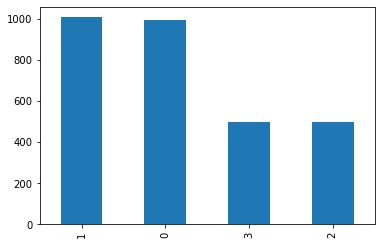

In [98]:
#بخش 3
#سوال2
import matplotlib.pyplot as plt
(df['price_range'].value_counts()).plot(kind='bar')

In [104]:
#بخش 3
#سوال 3
df = pd.read_csv('mobileset.csv')
df['price_range'] = df['price_range'].replace([2,3], 1)
print(df['price_range'].value_counts())

1    2007
0     993
Name: price_range, dtype: int64


In [105]:
#بخش 3
#سوال4

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df['fc']=df['fc'].fillna(0)
df['four_g'] = df['four_g'].fillna(df['four_g'].mean())
df['pc'] = df['pc'].fillna(method ='backfill')

X = df.drop('price_range', axis=1)
Y = df['price_range']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state =101)
logisticModel=LogisticRegression(solver ='lbfgs', multi_class='multinomial', max_iter = 10000)
logisticModel.fit(X_train,Y_train)
logisticModel.score(X_test,Y_test)

y_pred = logisticModel.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('f1_score', f1_score(Y_test, y_pred, average="macro"))
print('precision_score' ,precision_score(Y_test, y_pred, average="macro"))
print('recall_score', recall_score(Y_test, y_pred, average="macro")) 

f1_score 0.7878174982318125
precision_score 0.7829895588396545
recall_score 0.7941120607787274


#بخش3

#سوال4
<div dir=rtl>
روش های مختلفی برای کلاس بندی این نوع داده ها ارائه شده است .در کلاس بندی این داده ها می کوشیم تا تعداد حالات کلاس اقلیت را نسبت به کلاس اکثریت افزایش دهیم

    1. Random Undersampling and Oversampling
یک روش بسیار ساده و شاید ساده‌ترین روش برای مقابله با داده‌های بسیار نامتعادل نیز نمونه‌گیری مجدد نامیده می‌شود. این روش شامل حذف نمونه‌ها از طبقه اقلیت (تحت نمونه‌گیری)و / یا افزودن مثال‌های بیشتر از طبقه اقلیت (نمونه‌گیری بیش از نمونه‌گیری)است.

    2. Undersampling and Oversampling using imbalanced-learn
یکی از روش‌هایی که آن فراهم می‌کند پیوندهای Tomek نامیده می‌شود. حذف عنصر اکثریت  که یک مرز تصمیم‌گیری بهتر برای طبقه‌بندی کننده را فراهم می‌کند.

    3.Oversampling using SMOTE:
در smote (تکنیک Oversampling اقلیت مصنوعی)، ما عناصری را برای طبقه اقلیت، در مجاورت عناصر موجود، ترکیب می‌کنیم.
</div>

In [143]:
#بخش 3
#سوال 5
df = pd.read_csv('mobileset.csv')
df['price_range'] = df['price_range'].replace([2,3], 1)

count_class_0, count_class_1 = df.price_range.value_counts()
df1 = df[df['price_range'] == 1]
df0 = df[df['price_range'] == 0]

Random under-sampling:
1    993
0    993
Name: price_range, dtype: int64


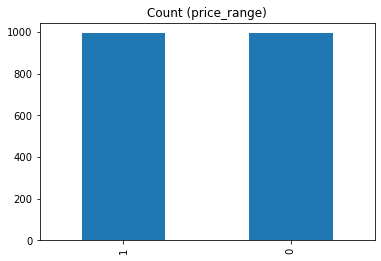

In [140]:
#Random under-sampling
df1_under = df1.sample(count_class_1)
df_test_under = pd.concat([df1_under, df0], axis=0)

print('Random under-sampling:')
print(df_test_under.price_range.value_counts())

df_test_under.price_range.value_counts().plot(kind='bar', title='Count (price_range)');

Random over-sampling:
1    2007
0    2007
Name: price_range, dtype: int64


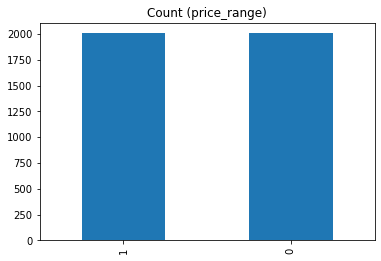

In [142]:
#Random over-sampling
df0_over = df0.sample(count_class_0, replace=True)
df_test_over = pd.concat([df1, df0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.price_range.value_counts())

df_test_over.price_range.value_counts().plot(kind='bar', title='Count (price_range)');

In [150]:
#رگرسیون لجستیک روی داده های oversample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = df_test_over

df['fc']=df['fc'].fillna(0)
df['four_g'] = df['four_g'].fillna(df['four_g'].mean())
df['pc'] = df['pc'].fillna(method ='backfill')

X = df.drop('price_range', axis=1)
Y = df['price_range']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state =101)
logisticModel=LogisticRegression(solver ='lbfgs', multi_class='multinomial', max_iter = 10000)
logisticModel.fit(X_train,Y_train)
logisticModel.score(X_test,Y_test)

y_pred = logisticModel.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('f1_score', f1_score(Y_test, y_pred, average="macro"))
print('precision_score' ,precision_score(Y_test, y_pred, average="macro"))
print('recall_score', recall_score(Y_test, y_pred, average="macro")) 

f1_score 0.8264242782386926
precision_score 0.8303643090042638
recall_score 0.8268352749965882


In [156]:
#بخش 3
#سوال 6

import statsmodels.api as sm

df = pd.read_csv('mobileset.csv')
df['fc']=df['fc'].fillna(0)
df['four_g'] = df['four_g'].fillna(df['four_g'].mean())
df['pc'] = df['pc'].fillna(method ='backfill')


def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features



X = df.drop('price_range', axis=1)
Y = df['price_range']
Feature_list = (forward_selection(X,Y))

<ipython-input-156-0e5a79328371>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-156-0e5a79328371>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-156-0e5a79328371>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-156-0e5a79328371>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_fe

In [158]:
#بخش 3
#سوال 7
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df['fc']=df['fc'].fillna(0)
df['four_g'] = df['four_g'].fillna(df['four_g'].mean())
df['pc'] = df['pc'].fillna(method ='backfill')

X = df[Feature_list]
Y = df['price_range']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state =101)
logisticModel=LogisticRegression(solver ='lbfgs', multi_class='multinomial', max_iter = 10000)
logisticModel.fit(X_train,Y_train)
logisticModel.score(X_test,Y_test)

y_pred = logisticModel.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('f1_score', f1_score(Y_test, y_pred, average="macro"))
print('precision_score' ,precision_score(Y_test, y_pred, average="macro"))
print('recall_score', recall_score(Y_test, y_pred, average="macro")) 

f1_score 0.7049819947874444
precision_score 0.697554936626989
recall_score 0.716901203256837


c:\users\moein\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
#بخش 3
#سوال 9
df['fc']=df['fc'].fillna(0)
df['four_g'] = df['four_g'].fillna(df['four_g'].mean())
df['pc'] = df['pc'].fillna(method ='backfill')

X = df[Feature_list]
Y = df['price_range']

X = df.drop('price_range', axis=1)
Y = df['price_range']

pca = PCA(n_components=7)
pca.fit(X,Y)
print(list(pca.explained_variance_ratio_))
print(list(pca.singular_values_))

[0.609724074766383, 0.21500125163994332, 0.07174253425086446, 0.049081526272640445, 0.030045501890313027, 0.023720208535572825, 0.0004041874740618399]
[81287.91534511611, 48270.2789408491, 27883.52470549853, 23063.13515635128, 18044.67422952623, 16033.139298288304, 2092.9108989802667]


In [175]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state =101)
logisticModel=LogisticRegression(solver ='lbfgs', multi_class='multinomial', max_iter = 10000)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
logisticModel.fit(X_train_pca, Y_train)

y_pred = logisticModel.predict(X_test_pca)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('f1_score', f1_score(Y_test, y_pred, average="macro"))
print('precision_score' ,precision_score(Y_test, y_pred, average="macro"))
print('recall_score', recall_score(Y_test, y_pred, average="macro")) 

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [189]:
#بخش 3
#سوال 11
#5k
from sklearn.model_selection import KFold

df = pd.read_csv('mobileset.csv')
df['fc']=df['fc'].fillna(0)
df['four_g'] = df['four_g'].fillna(df['four_g'].mean())
df['pc'] = df['pc'].fillna(method ='backfill')

X = df.to_numpy()
Y = df['price_range'].to_numpy() 
weights = np.random.rand(1)
b = np.random.rand(1) 
bias = np.array([b[0] for i in range(len(X))])


kf = KFold(n_splits=5)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

logisticModel=LogisticRegression(solver ='lbfgs', multi_class='multinomial', max_iter = 10000)
logisticModel.fit(X_train,Y_train)
logisticModel.score(X_test,Y_test)

y_pred = logisticModel.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('f1_score', f1_score(Y_test, y_pred, average="macro"))
print('precision_score' ,precision_score(Y_test, y_pred, average="macro"))
print('recall_score', recall_score(Y_test, y_pred, average="macro")) 


f1_score 0.18833125601501977
precision_score 0.15819705892175306
recall_score 0.23264716504153124


c:\users\moein\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
